In [28]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load data from sklearn
from sklearn.datasets import load_boston  #Load default datasets
df = load_boston()
#df

#convert to a dataset
dataset = pd.DataFrame(df.data) # converting to dataframe
#print(dataset.head())
dataset.columns = df.feature_names #Assigning column names
#dataset.head()

#Adding target variable to dataframe, because in sklearn, dataset target will be there separately
dataset["Price"] = df.target
dataset.head()

#Separate independent and dependant variable
X = dataset.iloc[:,:-1] # independant variables
Y = dataset.iloc[:,-1]

In [33]:
#Linear Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lin_regressor = linear_model.LinearRegression()
mse = cross_val_score(lin_regressor,X,Y, scoring = 'neg_mean_squared_error',cv = 5) #(estimator, x, y, scoring='any scoring method', cv we can mention fold)
mean_mse = np.mean(mse) #CV =5, so 5 values will be there at mse in list, so doing average
print(mean_mse)

-37.13180746769922


In [39]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

#Print best score from GridSearchCV
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.90570194754033


In [40]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

#Print best score from GridSearchCV
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

{'alpha': 1}
-35.531580220694856


In [41]:
#Prediction
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

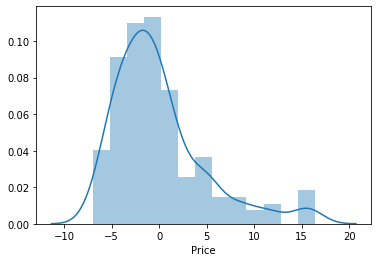

In [47]:
import seaborn as sns
sns.distplot(Y_test-prediction_lasso)

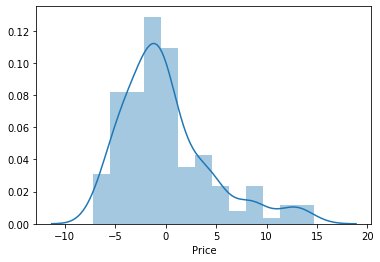

In [46]:
sns.distplot(Y_test-prediction_ridge)